In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
curb_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_CurbRamps_0720.csv")
curb_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,CurbRamps_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,9.4,4078.977747,12.167755
3,530330005002,0.8,1272.567412,3.319274
4,530330006001,0.0,721.497231,0.000000


In [3]:
problem_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_Problems_0720.csv")
problem_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,Problems_WeightedCount_per_mile
0,530330004012,80.0,3746.260838,112.752427
1,530330004023,3.0,305.668468,51.820851
2,530330004024,6.0,4078.977747,7.766652
3,530330005002,10.0,1272.567412,41.490926
4,530330006001,0.0,721.497231,0.000000


In [4]:
nosidewalk_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_NoSidewalk_0720.csv")
nosidewalk_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,NoSidewalk_WeightedCount_per_mile
0,530330004012,80.0,3746.260838,112.752427
1,530330004023,3.0,305.668468,51.820851
2,530330004024,0.0,4078.977747,0.000000
3,530330005002,8.0,1272.567412,33.192741
4,530330006001,0.0,721.497231,0.000000


In [5]:
nocurbramp_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_NoCurbRamp_0720.csv")
nocurbramp_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,NoCurbRamp_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,0.0,4078.977747,0.000000
3,530330005002,2.0,1272.567412,8.298185
4,530330006001,0.0,721.497231,0.000000


In [6]:
surfaceproblem_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_SurfaceProblem_0720.csv")
surfaceproblem_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,SurfaceProblem_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,4.0,4078.977747,5.177768
3,530330005002,0.0,1272.567412,0.000000
4,530330006001,0.0,721.497231,0.000000


In [7]:
obstacle_labels = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts_Obstacle_0720.csv")
obstacle_labels.head()

,GEOID10,WeightedCount,SidewalkLeng,Obstacle_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,2.0,4078.977747,2.588884
3,530330005002,0.0,1272.567412,0.000000
4,530330006001,0.0,721.497231,0.000000


In [8]:
social_factors = pd.read_csv("SeattleData/SeattleSocialFactors_1.csv")
social_factors.head()

,Geo_FIPS,family_ppl%,ttw_30_59%,ttw_60_89%,ttw_90%,ttw_bycar%,ttw_bytransit%,ttw_bybike%,ttw_byfoot%,median_vehicles_per_household,ppl_growth%_2010_2020,ppl_growth%_2020_2025,median_rent,income_household_median,income_percapita,quality_of_life_score,daytime_ppl,transport_expenditure%,vehicle_purchase%,gas%,vehicle_others%,public_transport%,ppl_density,ppl_density_change,ppl_density_change%,hs_1_detached%,hs_1_attached%,hs_2%,hs_3_4%,hs_5_9%,hs_10_19%,hs_20_49%,hs_50p%,mortality_index,murder_index,rape_index,robbery_index,assault_index,burglary_index,larceny_index,car_theft_index,crime_index
0,530330001001,0.805365,0.248281,0.000000,0.000000,0.365887,0.070839,0.026823,0.000000,1.6,16.32,4.40,1647,154138,71251,133,1035,0.149076,0.404101,0.173287,0.310203,0.118847,4209.9,590.7,0.140312,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104,26,13,8,74,71,123,75,37
1,530330001002,0.666436,0.183011,0.015884,0.060083,0.306630,0.185773,0.000000,0.000000,1.6,17.34,4.28,821,30978,23190,123,1004,0.157356,0.391732,0.204916,0.326656,0.077755,13004.2,1921.9,0.147791,0.147059,0.043417,0.060224,0.060224,0.135854,0.054622,0.100840,0.397759,93,196,197,185,196,147,188,197,196
2,530330001003,0.593532,0.314521,0.022194,0.000000,0.424857,0.103995,0.019023,0.000000,1.6,17.95,4.57,797,66118,52181,119,1321,0.152064,0.393374,0.189434,0.320162,0.100150,11017.0,1676.7,0.152192,0.302583,0.066421,0.000000,0.146371,0.067651,0.094711,0.017220,0.305043,95,194,193,174,192,124,180,194,193
3,530330001004,0.608620,0.124636,0.056494,0.000000,0.367501,0.147932,0.000000,0.012813,1.7,15.08,4.37,674,34758,22211,124,1700,0.158326,0.387533,0.208966,0.332019,0.072405,35176.5,4609.6,0.131042,0.060706,0.039735,0.000000,0.025386,0.161148,0.162252,0.320088,0.195364,22,197,196,186,194,147,189,196,196
4,530330001005,0.396004,0.253406,0.023615,0.000000,0.345141,0.184378,0.015441,0.020890,1.6,16.88,4.54,989,57292,41977,119,1007,0.152415,0.386423,0.193007,0.320597,0.095382,12370.6,1786.4,0.144407,0.127596,0.000000,0.000000,0.000000,0.037092,0.000000,0.106825,0.728487,150,187,168,194,182,171,196,187,179


In [9]:
social_factors = social_factors.rename(columns={'Geo_FIPS': 'GEOID10'})

In [10]:
df = social_factors.merge(curb_labels, how='inner', on='GEOID10')
df = df.merge(problem_labels, how='outer', on='GEOID10')
df = df.merge(nocurbramp_labels, how='outer', on='GEOID10')
df = df.merge(nosidewalk_labels, how='outer', on='GEOID10')
df = df.merge(surfaceproblem_labels, how='outer', on='GEOID10')
df = df.merge(obstacle_labels, how='outer', on='GEOID10')

In [11]:
df.head()

,GEOID10,family_ppl%,ttw_30_59%,ttw_60_89%,ttw_90%,ttw_bycar%,ttw_bytransit%,ttw_bybike%,ttw_byfoot%,median_vehicles_per_household,ppl_growth%_2010_2020,ppl_growth%_2020_2025,median_rent,income_household_median,income_percapita,quality_of_life_score,daytime_ppl,transport_expenditure%,vehicle_purchase%,gas%,vehicle_others%,public_transport%,ppl_density,ppl_density_change,ppl_density_change%,hs_1_detached%,hs_1_attached%,hs_2%,hs_3_4%,hs_5_9%,hs_10_19%,hs_20_49%,hs_50p%,mortality_index,murder_index,rape_index,robbery_index,assault_index,burglary_index,larceny_index,car_theft_index,crime_index,WeightedCount_x,SidewalkLeng_x,CurbRamps_WeightedCount_per_mile,WeightedCount_y,SidewalkLeng_y,Problems_WeightedCount_per_mile,WeightedCount_x,SidewalkLeng_x,NoCurbRamp_WeightedCount_per_mile,WeightedCount_y,SidewalkLeng_y,NoSidewalk_WeightedCount_per_mile,WeightedCount_x,SidewalkLeng_x,SurfaceProblem_WeightedCount_per_mile,WeightedCount_y,SidewalkLeng_y,Obstacle_WeightedCount_per_mile
0,530330004012,0.622730,0.181605,0.024019,0.000000,0.289397,0.057996,0.006444,0.022261,1.6,18.38,4.10,992,89959,52108,121,1312,0.153379,0.400576,0.187448,0.317746,0.094556,10864.0,1686.6,0.155247,0.432298,0.083230,0.0,0.017391,0.016149,0.000000,0.336646,0.114286,146,166,42,177,141,136,185,161,147,0.0,3746.260838,0.000000,80.0,3746.260838,112.752427,0.0,3746.260838,0.000000,80.0,3746.260838,112.752427,0.0,3746.260838,0.000000,0.0,3746.260838,0.000000
1,530330004023,0.666900,0.185133,0.015428,0.000000,0.260870,0.107293,0.046985,0.000000,1.6,19.43,4.21,986,64604,56927,129,919,0.155028,0.399523,0.189448,0.321140,0.091672,11444.4,1861.9,0.162691,0.310044,0.135371,0.0,0.043668,0.117904,0.152838,0.240175,0.000000,107,95,35,25,121,55,91,89,87,0.0,305.668468,0.000000,3.0,305.668468,51.820851,0.0,305.668468,0.000000,3.0,305.668468,51.820851,0.0,305.668468,0.000000,0.0,305.668468,0.000000
2,530330004024,0.582168,0.188228,0.061772,0.000000,0.298951,0.085082,0.000000,0.047786,1.6,15.25,4.25,1271,68257,43276,129,2626,0.157307,0.401491,0.192399,0.322975,0.077128,10988.3,1453.6,0.132286,0.296414,0.071730,0.0,0.000000,0.000000,0.000000,0.141350,0.490506,182,49,12,17,197,62,108,72,88,9.4,4078.977747,12.167755,6.0,4078.977747,7.766652,0.0,4078.977747,0.000000,0.0,4078.977747,0.000000,4.0,4078.977747,5.177768,2.0,4078.977747,2.588884
3,530330005002,0.829442,0.187817,0.078173,0.000000,0.349239,0.087310,0.000000,0.000000,2.6,12.31,4.67,1313,133929,74433,127,587,0.149684,0.402849,0.173886,0.311671,0.119486,6306.7,691.5,0.109645,0.964623,0.035377,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,169,27,111,102,138,30,75,101,32,0.8,1272.567412,3.319274,10.0,1272.567412,41.490926,2.0,1272.567412,8.298185,8.0,1272.567412,33.192741,0.0,1272.567412,0.000000,0.0,1272.567412,0.000000
4,530330006001,0.811298,0.175481,0.019832,0.021635,0.472356,0.056490,0.010216,0.000000,2.1,18.27,4.51,1026,68195,31917,123,1221,0.155259,0.399879,0.189436,0.313015,0.095347,4784.1,738.9,0.154449,0.823708,0.000000,0.0,0.000000,0.120061,0.022796,0.033435,0.000000,133,118,95,115,69,94,165,120,110,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000,0.0,721.497231,0.000000


In [12]:
df_plot = df.drop(columns=['GEOID10','murder_index','rape_index','robbery_index','assault_index','assault_index','burglary_index','larceny_index','car_theft_index','SidewalkLeng_y', 'WeightedCount_y','SidewalkLeng_x','WeightedCount_x'])
df_plot = df_plot.rename(columns={'CurbRamps_WeightedCount_per_mile': 'CurbRamps_wcpm','Problems_WeightedCount_per_mile': 'Problems_wcpm','NoCurbRamp_WeightedCount_per_mile': 'NoCurbRamp_wcpm','NoSidewalk_WeightedCount_per_mile': 'NoSidewalk_wcpm','SurfaceProblem_WeightedCount_per_mile': 'SurfaceProblem_wcpm','Obstacle_WeightedCount_per_mile': 'Obstacle_wcpm'})

In [13]:
df_plot

,family_ppl%,ttw_30_59%,ttw_60_89%,ttw_90%,ttw_bycar%,ttw_bytransit%,ttw_bybike%,ttw_byfoot%,median_vehicles_per_household,ppl_growth%_2010_2020,ppl_growth%_2020_2025,median_rent,income_household_median,income_percapita,quality_of_life_score,daytime_ppl,transport_expenditure%,vehicle_purchase%,gas%,vehicle_others%,public_transport%,ppl_density,ppl_density_change,ppl_density_change%,hs_1_detached%,hs_1_attached%,hs_2%,hs_3_4%,hs_5_9%,hs_10_19%,hs_20_49%,hs_50p%,mortality_index,crime_index,CurbRamps_wcpm,Problems_wcpm,NoCurbRamp_wcpm,NoSidewalk_wcpm,SurfaceProblem_wcpm,Obstacle_wcpm
0,0.622730,0.181605,0.024019,0.000000,0.289397,0.057996,0.006444,0.022261,1.6,18.38,4.10,992,89959,52108,121,1312,0.153379,0.400576,0.187448,0.317746,0.094556,10864.0,1686.6,0.155247,0.432298,0.083230,0.000000,0.017391,0.016149,0.000000,0.336646,0.114286,146,147,0.000000,112.752427,0.000000,112.752427,0.000000,0.000000
1,0.666900,0.185133,0.015428,0.000000,0.260870,0.107293,0.046985,0.000000,1.6,19.43,4.21,986,64604,56927,129,919,0.155028,0.399523,0.189448,0.321140,0.091672,11444.4,1861.9,0.162691,0.310044,0.135371,0.000000,0.043668,0.117904,0.152838,0.240175,0.000000,107,87,0.000000,51.820851,0.000000,51.820851,0.000000,0.000000
2,0.582168,0.188228,0.061772,0.000000,0.298951,0.085082,0.000000,0.047786,1.6,15.25,4.25,1271,68257,43276,129,2626,0.157307,0.401491,0.192399,0.322975,0.077128,10988.3,1453.6,0.132286,0.296414,0.071730,0.000000,0.000000,0.000000,0.000000,0.141350,0.490506,182,88,12.167755,7.766652,0.000000,0.000000,5.177768,2.588884
3,0.829442,0.187817,0.078173,0.000000,0.349239,0.087310,0.000000,0.000000,2.6,12.31,4.67,1313,133929,74433,127,587,0.149684,0.402849,0.173886,0.311671,0.119486,6306.7,691.5,0.109645,0.964623,0.035377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,169,32,3.319274,41.490926,8.298185,33.192741,0.000000,0.000000
4,0.811298,0.175481,0.019832,0.021635,0.472356,0.056490,0.010216,0.000000,2.1,18.27,4.51,1026,68195,31917,123,1221,0.155259,0.399879,0.189436,0.313015,0.095347,4784.1,738.9,0.154449,0.823708,0.000000,0.000000,0.000000,0.120061,0.022796,0.033435,0.000000,133,110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.837209,0.155900,0.017227,0.000000,0.317829,0.049096,0.027562,0.018088,2.0,12.50,4.39,650,83025,40006,134,3375,0.152676,0.385284,0.190124,0.317990,0.106969,11965.9,1329.6,0.111116,0.793103,0.118227,0.000000,0.000000,0.054187,0.034483,0.000000,0.000000,103,166,3.992901,49.385886,27.319852,8.406108,13.659926,0.000000
360,0.728529,0.182626,0.000000,0.022705,0.315893,0.160908,0.045410,0.000000,2.2,16.17,4.54,674,54754,24352,123,2302,0.158845,0.401030,0.200471,0.322137,0.073636,2495.6,347.4,0.139205,0.650794,0.111111,0.058957,0.083900,0.074830,0.020408,0.000000,0.000000,53,95,24.433550,50.903229,50.903229,0.000000,0.000000,0.000000
361,0.741635,0.211190,0.009874,0.026330,0.315963,0.130005,0.000000,0.017005,1.7,15.75,4.39,655,42232,27848,118,1008,0.155521,0.394656,0.197639,0.322720,0.083887,10929.3,1486.8,0.136038,0.464286,0.022619,0.000000,0.036905,0.020238,0.020238,0.133333,0.302381,165,196,34.025128,0.000000,0.000000,0.000000,0.000000,0.000000
362,0.775833,0.186667,0.000000,0.011667,0.388333,0.069167,0.000000,0.000000,2.4,18.93,4.42,1357,122101,62878,125,765,0.154438,0.406188,0.182706,0.315939,0.097685,5360.2,853.1,0.159155,0.958984,0.000000,0.041016,0.000000,0.000000,0.000000,0.000000,0.000000,146,56,13.049547,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
r1 = stats.pearsonr(df_plot['Problems_wcpm'], df_plot['ppl_density'])
r1

(-0.36782463931408643, 4.192107383922401e-13)

In [16]:
text1 = "r={:.3f}, p≤0.005".format(r1[0], r1[1])
text1

'r=-0.368, p≤0.005'

Text(0, 270, 'r=-0.368, p≤0.005')

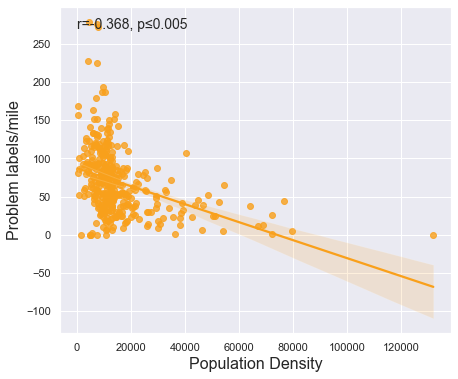

In [52]:
plt.figure(figsize = (7,6))
p1= sns.regplot(y="Problems_wcpm", x="ppl_density", data=df_plot,fit_reg=True, color="#F9A01B");
p1.set_xlabel("Population Density", fontsize = 16)
p1.set_ylabel("Problem labels/mile", fontsize = 16)
p1.annotate(text1, xy=(0,270),fontsize = 14)

In [53]:
p1.figure.savefig("Figures/8.png")

In [21]:
r2 = stats.pearsonr(df_plot['Problems_wcpm'], df_plot['family_ppl%'])
r2

(0.3909420571659963, 9.681396855010586e-15)

In [22]:
text2 = "r={:.3f},  p≤0.005".format(r2[0], r2[1])
text2

'r=0.391,  p≤0.005'

Text(0, 270, 'r=0.391,  p≤0.005')

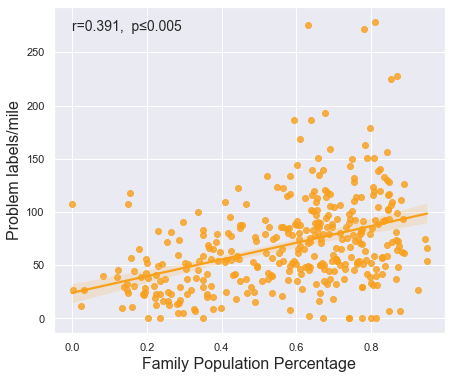

In [54]:
plt.figure(figsize = (7,6))
p2= sns.regplot(y="Problems_wcpm", x="family_ppl%", data=df_plot,fit_reg=True, color="#F9A01B");
p2.set_xlabel("Family Population Percentage", fontsize = 16)
p2.set_ylabel("Problem labels/mile", fontsize = 16)
p2.annotate(text2, xy=(0,270),fontsize = 14)

In [55]:
p2.figure.savefig("Figures/9.png")

In [29]:
r3 = stats.pearsonr(df_plot['Problems_wcpm'], df_plot['ttw_bycar%'])
r3

(0.317722452212918, 5.562642679314599e-10)

In [30]:
text3 = "r={:.3f}, p≤0.005".format(r3[0], r3[1])
text3

'r=0.318, p≤0.005'

Text(0.03, 270, 'r=0.318, p≤0.005')

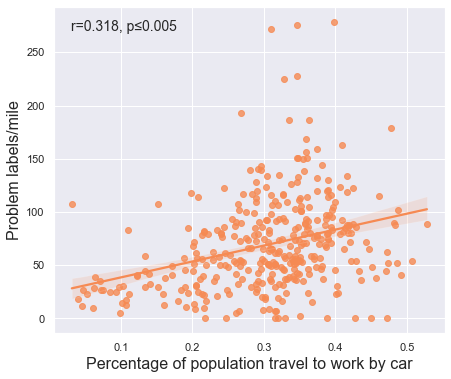

In [56]:
plt.figure(figsize = (7,6))
p3= sns.regplot(y="Problems_wcpm", x="ttw_bycar%", data=df_plot,fit_reg=True, color="#F68A53");
p3.set_xlabel("Percentage of population travel to work by car", fontsize = 16)
p3.set_ylabel("Problem labels/mile", fontsize = 16)
p3.annotate(text3, xy=(0.03,270),fontsize = 14)

In [57]:
p3.figure.savefig("Figures/10.png")

In [36]:
r4 = stats.pearsonr(df_plot['Problems_wcpm'], df_plot['ttw_byfoot%'])
r4

(-0.3900741009245652, 1.121362688051284e-14)

In [37]:
text4 = "r={:.3f}, p≤0.005".format(r4[0], r4[1])
text4

'r=-0.390, p≤0.005'

Text(0, 270, 'r=-0.390, p≤0.005')

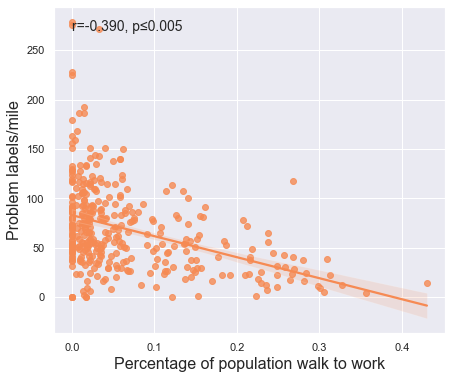

In [58]:
plt.figure(figsize = (7,6))
p4 = sns.regplot(y="Problems_wcpm", x="ttw_byfoot%", data=df_plot,fit_reg=True, color="#F68A53");
p4.set_xlabel("Percentage of population walk to work", fontsize = 16)
p4.set_ylabel("Problem labels/mile", fontsize = 16)
p4.annotate(text4, xy=(0,270),fontsize = 14)

In [59]:
p4.figure.savefig("Figures/11.png")

In [40]:
r5 = stats.pearsonr(df_plot['Problems_wcpm'], df_plot['median_vehicles_per_household'])
r5

(0.4483163600581799, 2.1294695914943125e-19)

In [41]:
text5 = "r={:.3f}, p≤0.005".format(r5[0], r5[1])
text5

'r=0.448, p≤0.005'

Text(0.75, 270, 'r=0.448, p≤0.005')

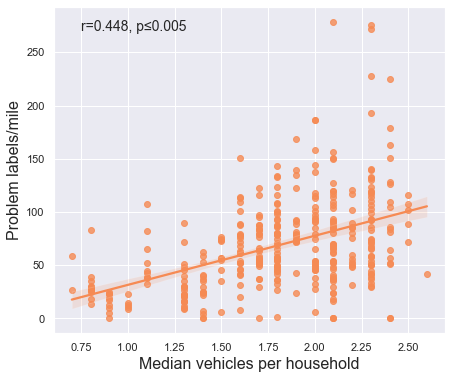

In [60]:
plt.figure(figsize = (7,6))
p5= sns.regplot(y="Problems_wcpm", x="median_vehicles_per_household", data=df_plot,fit_reg=True, color="#F68A53");
p5.set_xlabel("Median vehicles per household", fontsize = 16)
p5.set_ylabel("Problem labels/mile", fontsize = 16)
p5.annotate(text5, xy=(0.75,270),fontsize = 14)

In [61]:
p5.figure.savefig("Figures/12.png")

In [44]:
r6 = stats.pearsonr(df_plot['Problems_wcpm'], df_plot['hs_1_detached%'])
r6

(0.432466301917274, 5.070620447718408e-18)

In [45]:
text6 = "r={:.3f}, p≤0.005".format(r6[0], r6[1])
text6

'r=0.432, p≤0.005'

Text(0, 270, 'r=0.432, p≤0.005')

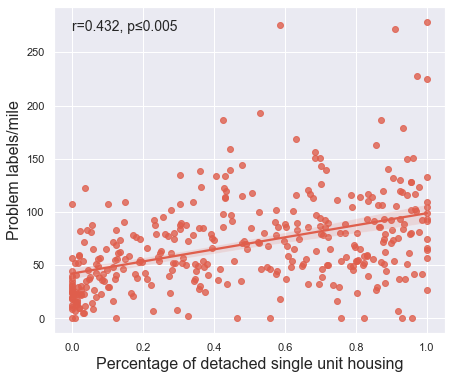

In [62]:
plt.figure(figsize = (7,6))
p6= sns.regplot(y="Problems_wcpm", x="hs_1_detached%", data=df_plot,fit_reg=True, color="#DF5E4C");
p6.set_xlabel("Percentage of detached single unit housing", fontsize = 16)
p6.set_ylabel("Problem labels/mile", fontsize = 16)
p6.annotate(text6, xy=(0,270),fontsize = 14)

In [64]:
p6.figure.savefig("Figures/13.png")

In [48]:
r7 = stats.pearsonr(df_plot['Problems_wcpm'], df_plot['hs_50p%'])
r7

(-0.40918254946618265, 3.9879358275029394e-16)

In [49]:
text7 = "r={:.3f}, p≤0.005".format(r7[0], r7[1])
text7

'r=-0.409, p≤0.005'

Text(0, 270, 'r=-0.409, p≤0.005')

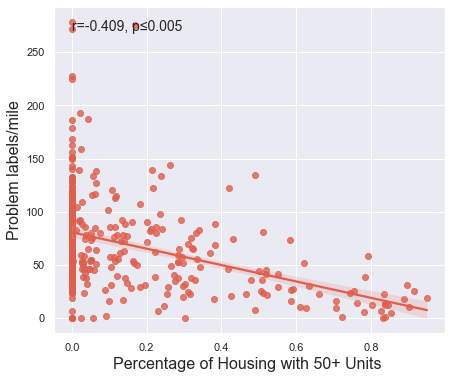

In [63]:
plt.figure(figsize = (7,6))
p7 = sns.regplot(y="Problems_wcpm", x="hs_50p%", data=df_plot,fit_reg=True, color="#DF5E4C");
p7.set_xlabel("Percentage of Housing with 50+ Units ", fontsize = 16)
p7.set_ylabel("Problem labels/mile", fontsize = 16)
p7.annotate(text7, xy=(0,270),fontsize = 14)

In [65]:
p7.figure.savefig("Figures/14.png")